# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
- un scatterplot = Nuage de points : pour des données généralement nombreuses, éventuellement interprétable par l'identification de relations, répartitions plus ou moins homogènes (graphique avec pleins de points dans un espace à n dimensions).
- un barplot = Graphique en barres : présenter des variables catégorielles avec des barres rectangulaires avec des hauteurs ou des longueurs proportionnelles aux valeurs qu'elles représentent.
- un boxplot = boîte à moustache : figurer le profil essentiel d'une série statistique quantitative (out layers, écart-types, médiane, etc...).
- un violinplot = tracé de violon : comparer des distributions de probabilité. Il est similaire à un diagramme en boîte, avec l'ajout d'un diagramme de densité de noyau pivoté de chaque côté.
- un histogramme : résumer des données discrètes ou continues qui sont présentées par intervalles de valeurs (différent d'un graphique en barre qui ne résume pas des données discrètes ou continues).
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [8]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Par préférence personnelle, j'ai choisi d'utiliser la suite anaconda sur mon ordinateur. Les lignes ci-dessus sont donc à re-commenter si vous souhaitez utiliser google colab.

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau en format "tsv" (csv mais avec des tabulations à la place de virgules).
Chaque ligne est un organisme dans le fichier (à part l'header).
Les colomnes sont décritent dans la réponse suivante.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Organism name at the species level according 
Kingdom        Taxonomic division: Archaea, Bacteria, Eukaryota, or Viruses 
Group                  Commonly used organism groups 
                       Eukaryota: Animals, Fungi, Plants, Protists;                           
                       Prokaryota: group corresponds to phylum; 
                       Viruses: groups defined as the first level (not ranked)                        
                       below the kingdom of Viruses

SubGroup       NCBI Taxonomy level below group:
                       Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians
                       Reptiles, Roundworms, Ascomycetes, Basidiomycetes, 
                       Land Plants, Green Algae, Apicomplexans, Kinetoplasts; 
                       Prokaryota: sub-groups correspond to class level; 
                       Viruses: sub-groups correspond to families including floating genera 

Size (Mb)      Estimated genome size 
Chrs           Number of chromosomes 
Organelles     Number of the organelles 
Plasmids       Number of plasmids 
BioProjects    Number of genome sequencing projects 
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [18]:
import pandas as pd

def read_file(path, sep='\t'):
    tab = pd.read_csv(path, sep=sep, low_memory=False)
    return tab

tab = read_file("overview.txt")
organisms = tab["#Organism/Name"]
print(len(set(organisms))) # Nombre d'organismes présents dans le tableau

87887


In [19]:
read_file("overview.txt")

,#Organism/Name,Kingdom,Group,SubGroup,Size (Mb),Chrs,Organelles,Plasmids,BioProjects
0,'Brassica napus' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.743598,-,-,-,1
1,'Catharanthus roseus' aster yellows phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.603949,1,-,1,1
2,'Chrysanthemum coronarium' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.739592,-,-,-,1
3,'Conium maculatum' witches'-broom phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.758186,-,-,-,1
4,'Cynodon dactylon' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.483935,-,-,-,1
...,...,...,...,...,...,...,...,...,...
87883,Zymoseptoria crescenta,Eukaryota,Fungi,Ascomycetes,47.0329,-,-,-,1
87884,Zymoseptoria passerinii,Eukaryota,Fungi,Ascomycetes,28.7863,-,-,-,1
87885,Zymoseptoria pseudotritici,Eukaryota,Fungi,Ascomycetes,32.0973,-,-,-,6
87886,Zymoseptoria tritici,Eukaryota,Fungi,Ascomycetes,39.6863,21,1,-,51


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
C'est une taxonomie (division).
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
4 royaumes sont présents dans la base : Archaea, Bacteria, Eukaryota, Viruses 
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [26]:
tab = pd.read_csv("overview.txt", sep="\t", low_memory=False)
kingdoms = {}

for k in tab["Kingdom"].unique():
    kingdoms[k] = len(tab[(tab["Kingdom"] == k)]["Group"])

print(kingdoms)

{'Bacteria': 37492, 'Viruses': 32573, 'Eukaryota': 15560, 'Archaea': 2263}


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Dans chaque royaumes se trouvent des groupes.

Préciser les groupes
```

Q9. Combien de groupes sont présents par royaume ?

In [31]:
tab = pd.read_csv("overview.txt", sep="\t", low_memory=False)
print(tab.groupby("Kingdom").nunique()["Group"])

Kingdom
Archaea      11
Bacteria     37
Eukaryota     5
Viruses       8
Name: Group, dtype: int64


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [33]:
group_by_kingdom = {}
for (kingdom, group), res in tab.groupby(["Kingdom", "Group"])["#Organism/Name"].aggregate(["count"]).iterrows():
    if not kingdom in group_by_kingdom:
        group_by_kingdom[kingdom] = []
    group_by_kingdom[kingdom].append(group + " : " + str(res.iloc[0]))

for k in group_by_kingdom:
    print(k)
    for g in group_by_kingdom[k]:
        print("\t" + g)
    print()

Archaea
	Asgard group : 61
	Candidatus Hadarchaeota : 8
	Candidatus Hydrothermarchaeota : 6
	Candidatus Thermoplasmatota : 432
	DPANN group : 249
	Euryarchaeota : 1035
	Halobacteriota : 1
	Other : 1
	TACK group : 408
	environmental samples : 5
	unclassified Archaea : 57

Bacteria
	Acidobacteriota : 256
	Aquificota : 42
	Atribacterota : 43
	Bacteria incertae sedis : 3872
	Bdellovibrionota : 122
	Caldisericota/Cryosericota group : 21
	Calditrichota : 10
	Campylobacterota : 256
	Candidatus Deferrimicrobiota : 2
	Candidatus Hinthialibacterota : 2
	Candidatus Krumholzibacteriota : 4
	Candidatus Lernaellota : 2
	Candidatus Moduliflexota : 2
	Candidatus Tharpellota : 2
	Chrysiogenota : 6
	Coprothermobacterota : 5
	Deferribacterota : 27
	Dictyoglomota : 5
	Elusimicrobiota : 118
	FCB group : 5037
	Fusobacteriota : 79
	Myxococcota : 146
	Nitrospinota/Tectimicrobiota group : 39
	Nitrospirota : 156
	Other : 2
	PVC group : 1091
	Pseudomonadota : 11098
	Spirochaetota : 344
	Synergistota : 85
	Terrab

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

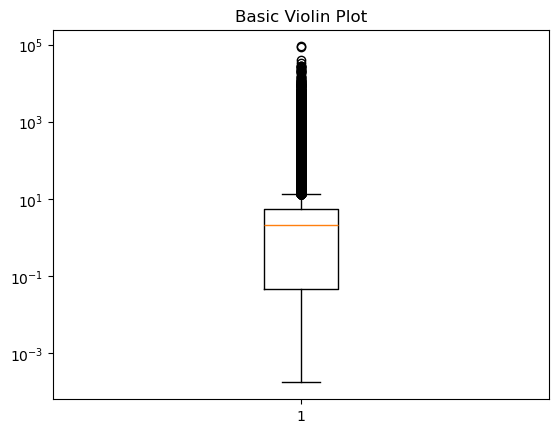

In [36]:
import numpy as np
import matplotlib.pyplot as plt

print()

data = [pd.to_numeric(tab[tab["Size (Mb)"] != "-"]["Size (Mb)"]).to_numpy()]

plt.boxplot(data)
plt.yscale("log")
plt.title('Basic Violin Plot')
plt.show()

Q12. Affichez la distribution par royaume.

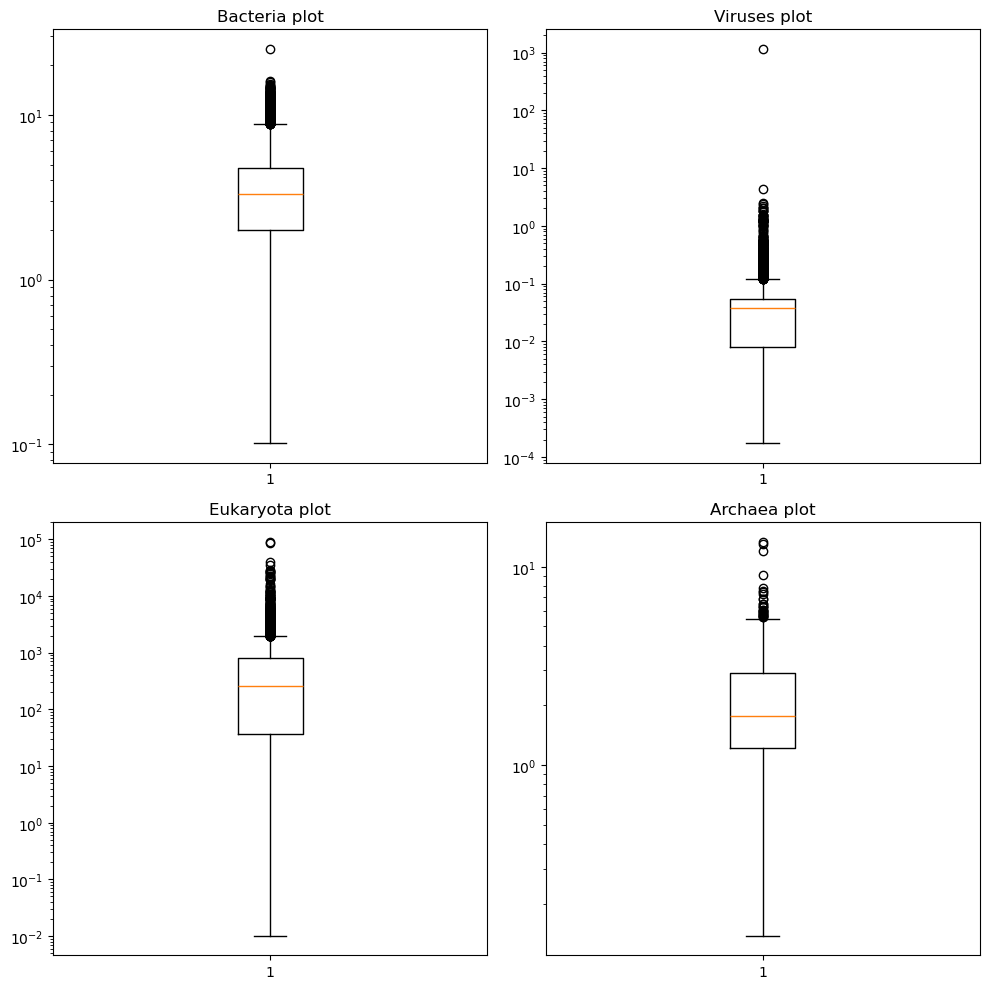

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flat

for i, k in enumerate(kingdoms):
    data = pd.to_numeric(tab[(tab["Size (Mb)"] != "-") & (tab["Kingdom"] == k)]["Size (Mb)"]).to_numpy()

    axes[i].boxplot(data)
    axes[i].set_yscale("log")
    axes[i].set_title(k + " plot")

plt.tight_layout()
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

In [40]:
for k in group_by_kingdom:
    print(k)
    for g in group_by_kingdom[k]:
        print("\t" + g)
    print()

Archaea
	Asgard group : 61
	Candidatus Hadarchaeota : 8
	Candidatus Hydrothermarchaeota : 6
	Candidatus Thermoplasmatota : 432
	DPANN group : 249
	Euryarchaeota : 1035
	Halobacteriota : 1
	Other : 1
	TACK group : 408
	environmental samples : 5
	unclassified Archaea : 57

Bacteria
	Acidobacteriota : 256
	Aquificota : 42
	Atribacterota : 43
	Bacteria incertae sedis : 3872
	Bdellovibrionota : 122
	Caldisericota/Cryosericota group : 21
	Calditrichota : 10
	Campylobacterota : 256
	Candidatus Deferrimicrobiota : 2
	Candidatus Hinthialibacterota : 2
	Candidatus Krumholzibacteriota : 4
	Candidatus Lernaellota : 2
	Candidatus Moduliflexota : 2
	Candidatus Tharpellota : 2
	Chrysiogenota : 6
	Coprothermobacterota : 5
	Deferribacterota : 27
	Dictyoglomota : 5
	Elusimicrobiota : 118
	FCB group : 5037
	Fusobacteriota : 79
	Myxococcota : 146
	Nitrospinota/Tectimicrobiota group : 39
	Nitrospirota : 156
	Other : 2
	PVC group : 1091
	Pseudomonadota : 11098
	Spirochaetota : 344
	Synergistota : 85
	Terrab

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [42]:
tabWithSize = tab.loc[tab["Size (Mb)"] != "-"].copy()
tabWithSize["Size (Mb)"] = pd.to_numeric(tabWithSize["Size (Mb)"])

min_indices = tabWithSize.groupby("Kingdom")["Size (Mb)"].idxmin()
tabWithSize.loc[min_indices, ["Kingdom", "#Organism/Name", "Size (Mb)"]]

,Kingdom,#Organism/Name,Size (Mb)
13060,Archaea,candidate division MSBL1 archaeon SCGC-AAA385M02,0.137797
7691,Bacteria,bacterium AG-323-L21,0.101587
33850,Eukaryota,Fragilariopsis kerguelensis,0.010223
38605,Viruses,Hippotragine gammaherpesvirus 1,0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [44]:
tabWithSize = tab.loc[tab["Size (Mb)"] != "-"].copy()
tabWithSize["Size (Mb)"] = pd.to_numeric(tabWithSize["Size (Mb)"])

min_indices = tabWithSize.groupby("Kingdom")["Size (Mb)"].idxmax()
tabWithSize.loc[min_indices, ["Kingdom", "#Organism/Name", "Size (Mb)"]]

,Kingdom,#Organism/Name,Size (Mb)
5108,Archaea,archaeon,13.3999
81774,Bacteria,Thiomonas,25.1426
85849,Eukaryota,Viscum album,91113.7000
84080,Viruses,uncultured virus,1150.6800


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

(array([4.1816e+04, 1.0380e+03, 1.0540e+03, 2.0900e+02, 5.7000e+01,
        1.4000e+01, 1.1000e+01, 4.0000e+00, 4.0000e+00, 1.3000e+01]),
 array([  1. ,  11.4,  21.8,  32.2,  42.6,  53. ,  63.4,  73.8,  84.2,
         94.6, 105. ]),
 <BarContainer object of 10 artists>)

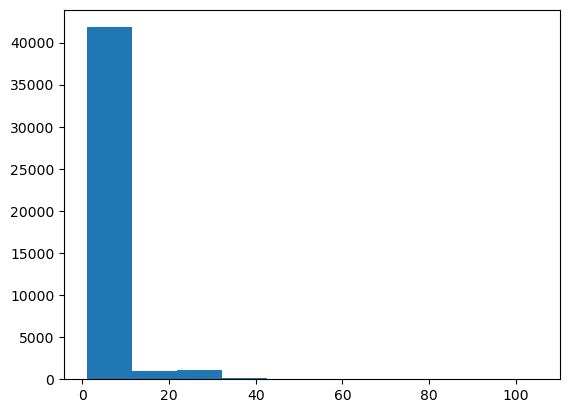

In [47]:
bins = tab["Chrs"].size
chrs = pd.to_numeric(tab[tab["Chrs"] != "-"]["Chrs"]).to_numpy()
plt.hist(chrs)

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

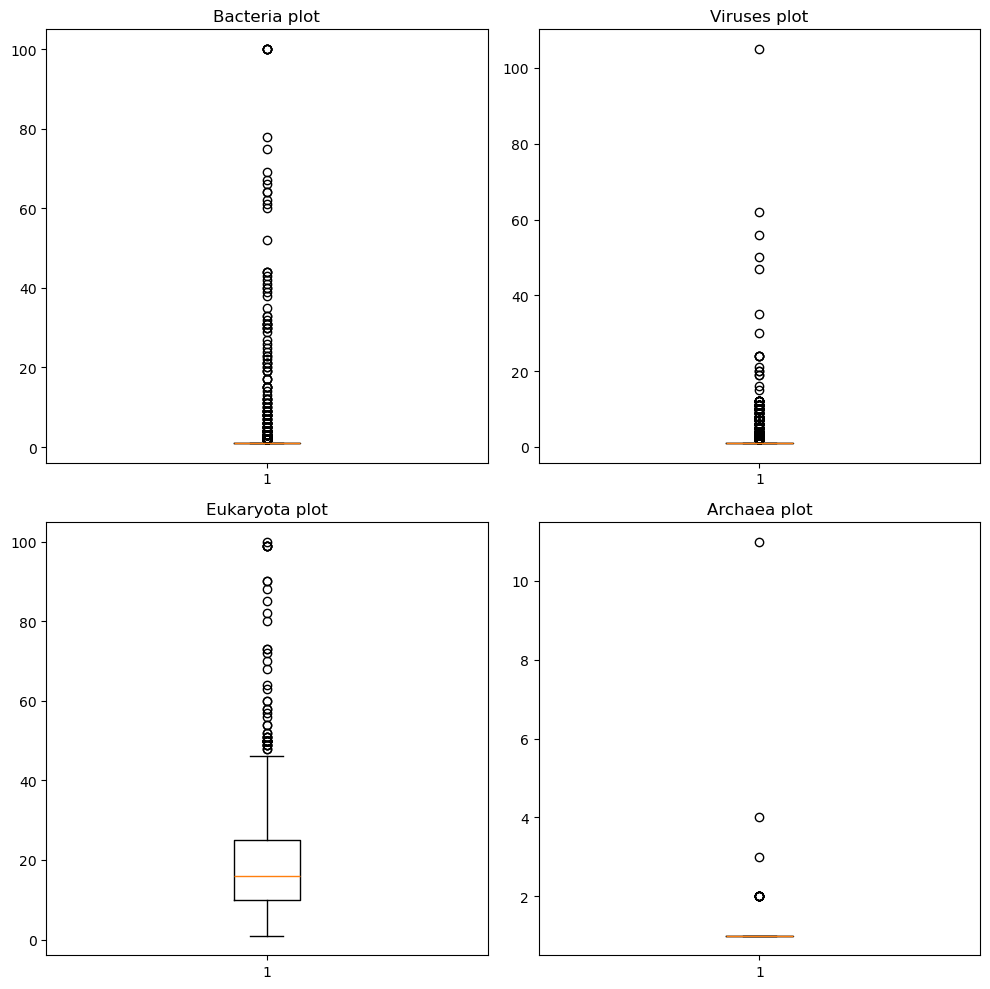

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flat

for i, k in enumerate(kingdoms):
    data = pd.to_numeric(tab[(tab["Chrs"] != "-") & (tab["Kingdom"] == k)]["Chrs"]).to_numpy()

    axes[i].boxplot(data)
    #axes[i].set_yscale("log")
    axes[i].set_title(k + " plot")

plt.tight_layout()
plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

(array([ 17.,  14.,  57.,  71., 106., 185., 178., 138., 108., 129., 191.,
        157., 123., 133.,  84.,  90.,  65., 114., 108.,  69.,  53.,  81.,
         79., 195.,  92.,  42.,  24.,  63.,  57., 105., 200.,  95.,  27.,
         22.,  23.,  32.,  16.,  15.,   9.,  21.,  28.,   6.,   6.,   5.,
          4.,  11.,   0.,   2.,   4.,  12.,   4.,   2.,   0.,   2.,   0.,
          1.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
          1.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
         16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
         24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
         32.68,  33.67,  34.66

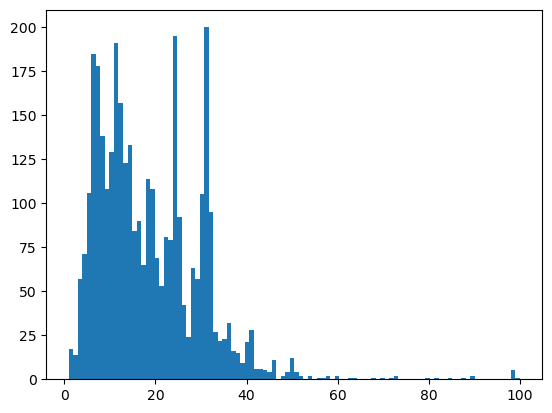

In [53]:
data = pd.to_numeric(tab[(tab["Chrs"] != "-") & (tab["Kingdom"] == "Eukaryota")]["Chrs"]).to_numpy()
plt.hist(data, bins=100)

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

Text(0, 0.5, 'Chromosomes')

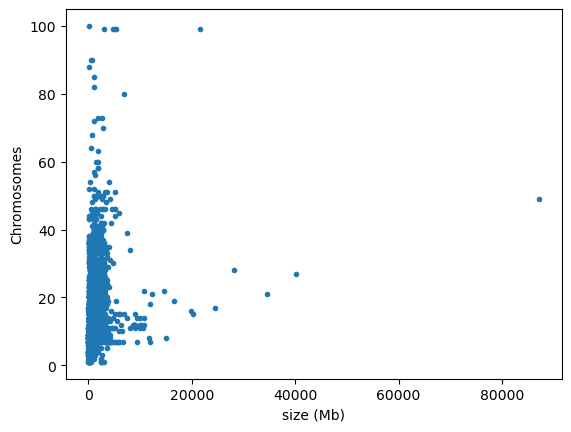

In [55]:
dataX = pd.to_numeric(tab[(tab["Chrs"] != "-") & (tab["Kingdom"] == "Eukaryota")]["Size (Mb)"]).to_numpy()
dataY = pd.to_numeric(tab[(tab["Chrs"] != "-") & (tab["Kingdom"] == "Eukaryota")]["Chrs"]).to_numpy()

plt.plot(dataX, dataY, ".")
plt.xlabel("size (Mb)")
plt.ylabel("Chromosomes")

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Les plasmides sont des petits fragments d'ADN circulaire présents dans la cellule bactérienne et indépendants du génome bactérien.
Source : https://genet.univ-tours.fr/gen001300_fichiers/CHAP5D/GEN05D1EC35.HTM
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

[0.27355425601039635, 0.3278272925331749, 0.2777777777777778, nan]


C:\Users\tombr\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tombr\anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<BarContainer object of 4 artists>

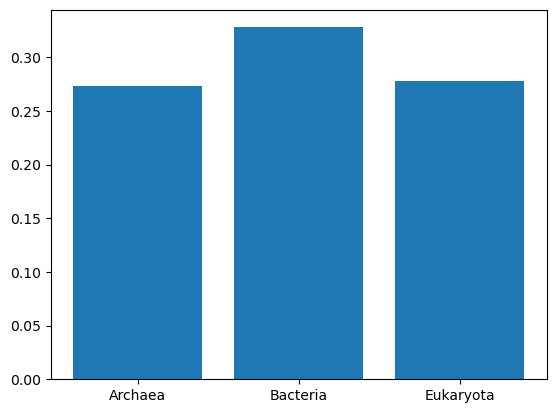

In [62]:
res = []
kingdoms = np.unique(tab["Kingdom"])
tab2 = tab.copy()
tab2[tab2["Plasmids"] == "-"] = 0

for i, k in enumerate(kingdoms):
    p = tab2[(tab2["Kingdom"] == k)]["Plasmids"]
    l = pd.to_numeric(p).to_numpy()
    l2 = np.concatenate((l, np.zeros(tab2[(tab2["Kingdom"] == k)].size - p.size)))
    m = np.mean(l2)
    res.append(m)

print(res)
plt.bar(kingdoms, res)

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [69]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [71]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [73]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [75]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [84]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [89]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [93]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [97]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [101]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [106]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [108]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [112]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [114]:
#Votre code ici